In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
train = pd.read_csv('train.csv')


In [50]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


<Axes: >

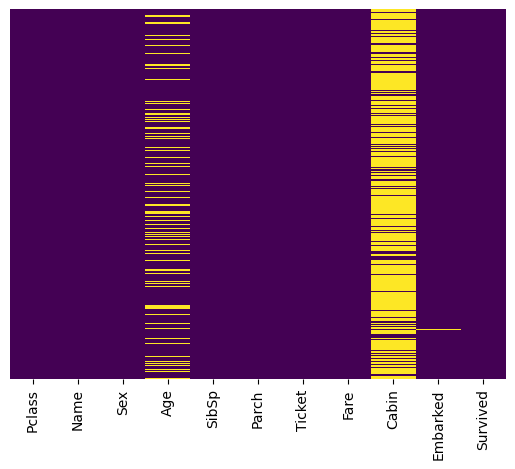

In [51]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

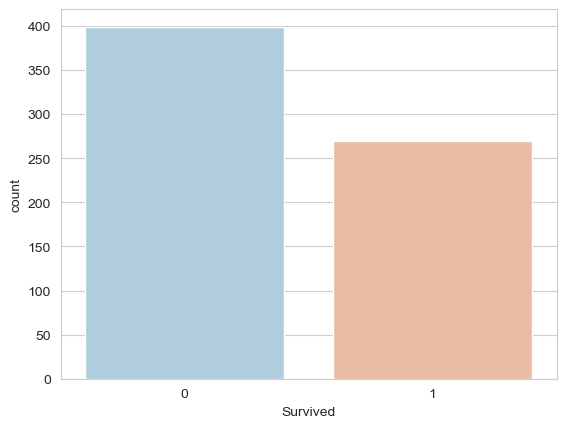

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

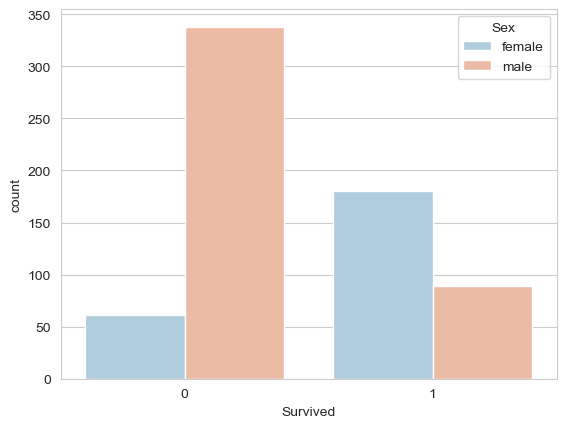

In [53]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

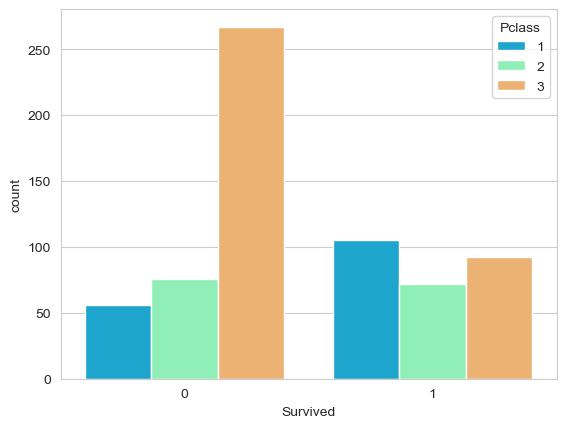

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

/var/folders/zb/z9z78mj15550thyl2dy60k9m0000gn/T/ipykernel_8433/1781747146.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='Age'>

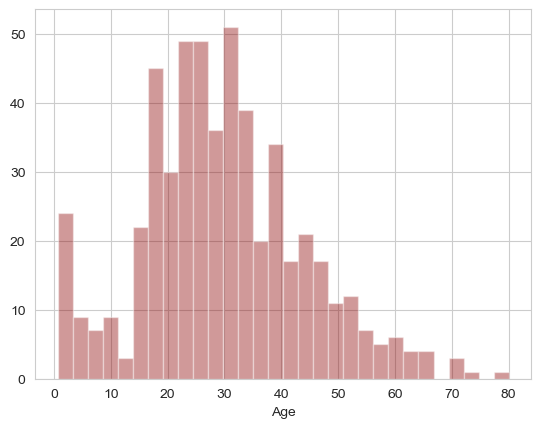

In [55]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

<Axes: >

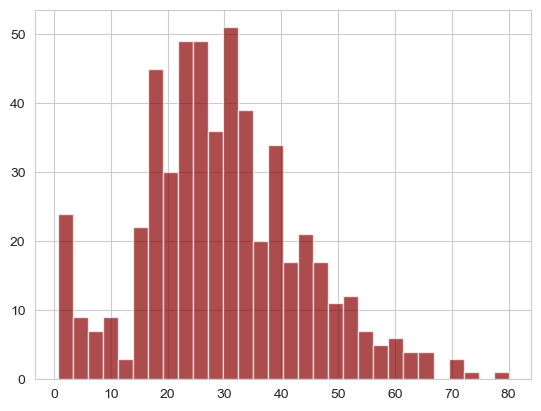

In [56]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

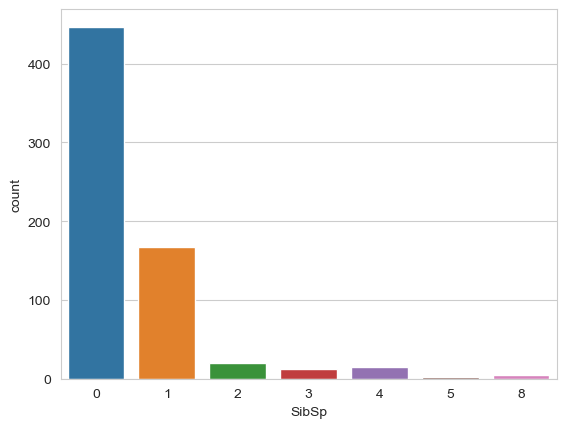

In [57]:
sns.countplot(x='SibSp',data=train)

<Axes: >

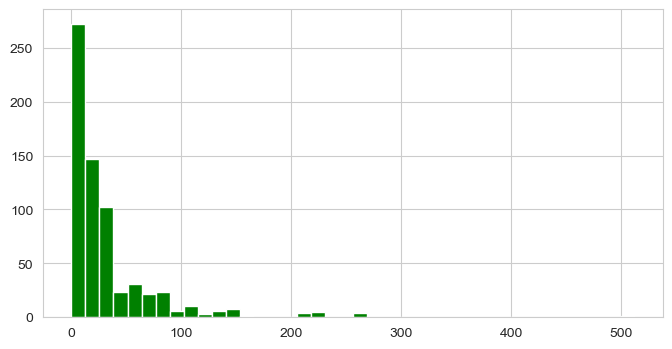

In [58]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [60]:
import cufflinks as cf
cf.go_offline()

In [61]:
train['Fare'].iplot(kind='hist',bins=30,color='green')


<Axes: xlabel='Pclass', ylabel='Age'>

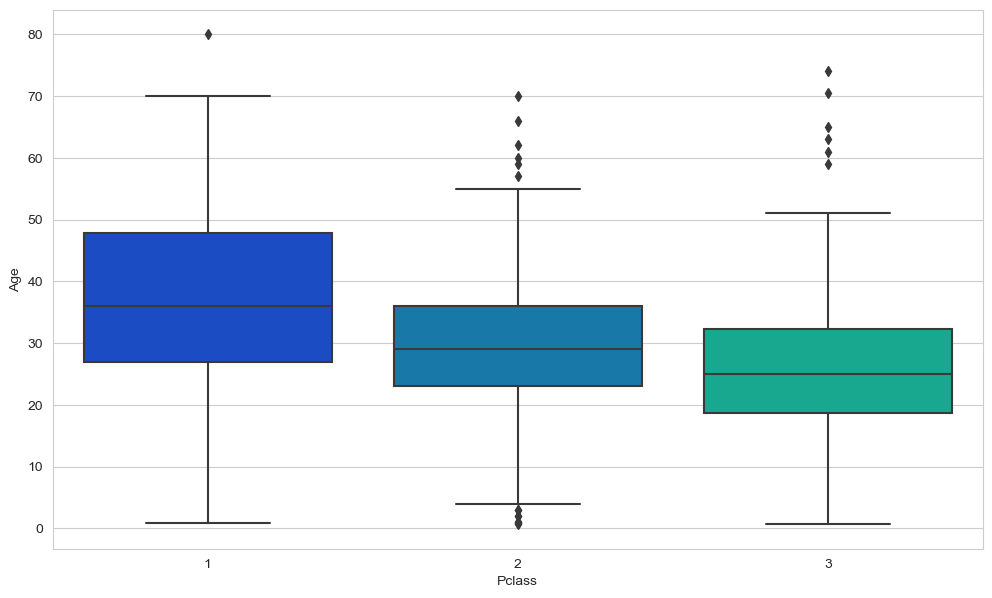

In [62]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [63]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [64]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)


<Axes: >

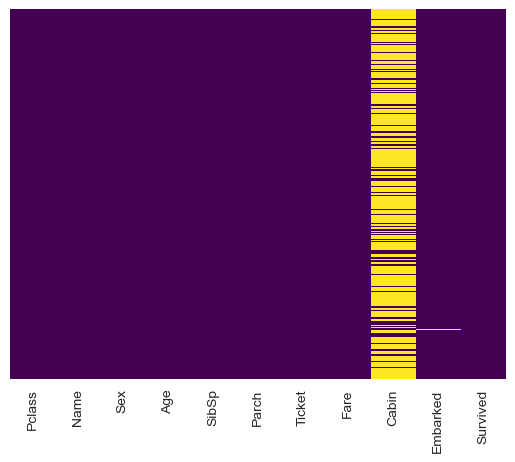

In [65]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [66]:
train.drop('Cabin',axis=1,inplace=True)


In [67]:
train.head()


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,24.0,0,0,A/5 2466,8.050,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,S,0


In [68]:
train.dropna(inplace=True)

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 0 to 667
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    667 non-null    int64  
 1   Name      667 non-null    object 
 2   Sex       667 non-null    object 
 3   Age       667 non-null    float64
 4   SibSp     667 non-null    int64  
 5   Parch     667 non-null    int64  
 6   Ticket    667 non-null    object 
 7   Fare      667 non-null    float64
 8   Embarked  667 non-null    object 
 9   Survived  667 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 57.3+ KB


In [70]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [71]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [72]:
train = pd.concat([train,sex,embark],axis=1)


In [73]:
train.head()


,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,2,29.0,1,0,26.000,1,0,0,1
1,3,24.0,0,0,8.050,0,1,0,1
2,2,39.0,0,0,26.000,0,1,0,1
3,3,29.0,0,4,21.075,0,0,0,1
4,3,25.0,0,0,7.050,0,1,0,1


In [74]:
from sklearn.model_selection import train_test_split


In [75]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [76]:
from sklearn.linear_model import LogisticRegression


In [77]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/manshusharma/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [78]:
predictions = logmodel.predict(X_test)


In [79]:
from sklearn.metrics import classification_report


In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       119
           1       0.78      0.76      0.77        82

    accuracy                           0.81       201
   macro avg       0.80      0.80      0.80       201
weighted avg       0.81      0.81      0.81       201

